In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, save 
import plotly.graph_objects as go
from bokeh.models import HoverTool
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix


/Users/ana.humel/repos/jupyter/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:

# Load the dataset
df = pd.read_csv('unsdg_2002_2021.csv')


### Data Exploration

In [3]:
# Display firt 5 rows of a dataset
df.head()

dt_year     dt_date      country                     region  \
0     2002  2002-01-01  Afghanistan  Central and Southern Asia   
1     2003  2003-01-01  Afghanistan  Central and Southern Asia   
2     2004  2004-01-01  Afghanistan  Central and Southern Asia   
3     2005  2005-01-01  Afghanistan  Central and Southern Asia   
4     2006  2006-01-01  Afghanistan  Central and Southern Asia   

  level_of_development  greenhousegas_emissione_mtco2equivalent  \
0      Least Developed                                      NaN   
1      Least Developed                                      NaN   
2      Least Developed                                      NaN   
3      Least Developed                                 19.32802   
4      Least Developed                                      NaN   

   total_government_revenue_proportion_of_gdp_perc  fdi_inflows_millionusd  \
0                                              NaN                    0.68   
1                                         0.120955                   50.00   
2                                         0.176214                   57.80   
3                                         0.180929                  186.90   
4                                         0.302234                  271.00   

   annual_growth_rate_perc  \
0                 0.420344   
1                 0.105249   
2                -0.014901   
3                 0.036212   
4                 0.053648   

   proportion_of_population_with_primary_reliance_on_clean_fuels_a  \
0                                                8.0                 
1                                                9.0                 
2                                               11.0                 
3                                               12.0                 
4                                               14.0                 

   mortality_rate_perc  \
0                  NaN   
1                  NaN   
2                  NaN   
3                0.409   
4                  NaN   

   renewable_energy_share_on_the_total_energy_consumption  \
0                                              37.83        
1                                              36.66        
2                                              44.24        
3                                              33.88        
4                                              31.89        

   co2emissions_from_fuel_combustion_in_millions_of_tonnes  \
0                                                NaN         
1                                                NaN         
2                                                NaN         
3                                                NaN         
4                                                NaN         

   fossilfuel_subsidies_consumption_and_production_billionusd  \
0                                                NaN            
1                                                NaN            
2                                                NaN            
3                                                NaN            
4                                                NaN            

   randd_expenditure_proportionofgdp_perc  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   

   national_action_plans_as_priority_national_policies  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     

   number_of_companies_publishing_sustainability_reports  \
0                                                NaN       
1                                                NaN       
2                                           

In [4]:
df.info() #See the summary of a dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5176 entries, 0 to 5175
Data columns (total 20 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   dt_year                                                          5176 non-null   int64  
 1   dt_date                                                          5176 non-null   object 
 2   country                                                          5176 non-null   object 
 3   region                                                           5176 non-null   object 
 4   level_of_development                                             5176 non-null   object 
 5   greenhousegas_emissione_mtco2equivalent                          1192 non-null   float64
 6   total_government_revenue_proportion_of_gdp_perc                  2693 non-null   float64
 7   fdi_inflows_millionusd                    

In [5]:
df['dt_date'] = pd.to_datetime(df['dt_date']) # Converting dt_date to datetime

In [6]:
df.shape #checking the number of rows and columns

(5176, 20)

In [7]:
df.describe() #Compute summary statistics for numeric columns

dt_year  greenhousegas_emissione_mtco2equivalent  \
count  5176.000000                              1192.000000   
mean   2011.493045                               349.787220   
std       5.763617                              1082.433384   
min    2002.000000                                 0.004870   
25%    2006.000000                                14.630493   
50%    2011.000000                                65.117955   
75%    2016.000000                               315.587295   
max    2021.000000                             12300.200000   

       total_government_revenue_proportion_of_gdp_perc  \
count                                      2693.000000   
mean                                          0.312233   
std                                           0.191328   
min                                           0.000000   
25%                                           0.199375   
50%                                           0.286012   
75%                                           0.388703   
max                                           3.656346   

       fdi_inflows_millionusd  annual_growth_rate_perc  \
count             3919.000000              4010.000000   
mean              6865.675610                 0.018005   
std              23807.915266                 0.060960   
min             -79077.278700                -0.602688   
25%                 65.338285                -0.002467   
50%                563.000000                 0.019989   
75%               3130.644250                 0.043838   
max             467625.000000                 0.946140   

       proportion_of_population_with_primary_reliance_on_clean_fuels_a  \
count                                        3627.000000                 
mean                                           62.385167                 
std                                            36.686869                 
min                                             5.000000                 
25%                                            22.000000                 
50%                                            83.000000                 
75%                                            95.000000                 
max                                            95.000000                 

       mortality_rate_perc  \
count           732.000000   
mean              0.214265   
std               0.081235   
min               0.073000   
25%               0.157000   
50%               0.212000   
75%               0.258000   
max               0.545000   

       renewable_energy_share_on_the_total_energy_consumption  \
count                                        4113.000000        
mean                                           27.741478        
std                                            29.140054        
min                                             0.000000        
25%                                             2.960000        
50%                                            16.430000        
75%                                            45.770000        
max                                            98.270000        

       co2emissions_from_fuel_combustion_in_millions_of_tonnes  \
count                                        2597.000000         
mean                                          198.372823         
std                                           798.934309         
min                                             0.360000         
25%                                             6.720000         
50%                                            25.800000         
75%                                            92.780000         
max                                          9876.500000         

       fossilfuel_subsidies_consumption_and_production_billionusd  \
count                                        1141.000000            
mean                                            2.108094            
std                                             6.041866            
mi

In [ ]:
# Calculating the correlation between columns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

/var/folders/4g/41b4hv8s6w5dp1kjrjmddtnc0000gr/T/ipykernel_28096/3660839411.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


In [9]:
# Creating an interactive heatmap with annotations using Plotly
fig = go.Figure(data=go.Heatmap(
    z=df.corr(),
    x=df.columns,
    y=df.columns,
    colorscale='Viridis'))

fig.update_layout(title='Correlation Heatmap',
                  xaxis_title='Columns',
                  yaxis_title='Columns')

fig.show()

/var/folders/4g/41b4hv8s6w5dp1kjrjmddtnc0000gr/T/ipykernel_28096/717663844.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  z=df.corr(),


In [10]:
df.isnull().sum() #Checking the count of missing values in each column

dt_year                                                               0
dt_date                                                               0
country                                                               0
region                                                                0
level_of_development                                                  0
greenhousegas_emissione_mtco2equivalent                            3984
total_government_revenue_proportion_of_gdp_perc                    2483
fdi_inflows_millionusd                                             1257
annual_growth_rate_perc                                            1166
proportion_of_population_with_primary_reliance_on_clean_fuels_a    1549
mortality_rate_perc                                                4444
renewable_energy_share_on_the_total_energy_consumption             1063
co2emissions_from_fuel_combustion_in_millions_of_tonnes            2579
fossilfuel_subsidies_consumption_and_production_billionusd      

Below we are going to group data and and calculate the means of some of our values. Grouping and calculating means is a vital step in data exploration. It provides key insights by summarizing central tendencies within specific columns, often within categories like regions. These means serve as summary statistics, uncovering data patterns, variations, and trends, and enabling straightforward comparisons between groups for decision-making and hypothesis testing.

In [11]:

# List of columns to visualize 

columns_to_calculate = ['proportion_of_population_with_primary_reliance_on_clean_fuels_a', 
                        'total_government_revenue_proportion_of_gdp_perc',
                        'annual_growth_rate_perc',
                        'fdi_inflows_millionusd',
                        'greenhousegas_emissione_mtco2equivalent',
                        'mortality_rate_perc',
                        'renewable_energy_share_on_the_total_energy_consumption',
                        'co2emissions_from_fuel_combustion_in_millions_of_tonnes',
                        'fossilfuel_subsidies_consumption_and_production_billionusd',
                        'randd_expenditure_proportionofgdp_perc',
                        'national_action_plans_as_priority_national_policies',
                        'number_of_companies_publishing_sustainability_reports',
                        'education_for_sustainable_development',
                        'enhance_policy_coherence_for_sustainable_development',
                        'land_degraded_over_total_land_area'
                       ]



In [12]:

# Group by 'region' and calculate the mean for each specified column
grouped_df = df.groupby('region')[columns_to_calculate].mean().reset_index()

# Melt the DataFrame to have 'Column' and 'Mean' columns
melted_df = pd.melt(grouped_df, id_vars=['region'], var_name='Column', value_name='Mean')

# Display the results
melted_df


region  \
0          Central and Southern Asia   
1     Eastern and South Eastern Asia   
2           Europe and North America   
3    Latin America and the Caribbean   
4      North Africa and Western Asia   
..                               ...   
115  Latin America and the Caribbean   
116    North Africa and Western Asia   
117                          Oceania   
118                            Other   
119               Sub-Saharan Africa   

                                                Column       Mean  
0    proportion_of_population_with_primary_reliance...  58.173585  
1    proportion_of_population_with_primary_reliance...  54.442105  
2    proportion_of_population_with_primary_reliance...  91.281955  
3    proportion_of_population_with_primary_reliance...  80.901116  
4    proportion_of_population_with_primary_reliance...  88.679198  
..                                                 ...        ...  
115                 land_degraded_over_total_land_area  26.058824  
116                 land_degraded_over_total_land_area  12.666667  
117                 land_degraded_over_total_land_area        NaN  
118                 land_degraded_over_total_land_area  19.000000  
119                 land_degraded_over_total_land_area  21.285714  

[120 rows x 3 columns]

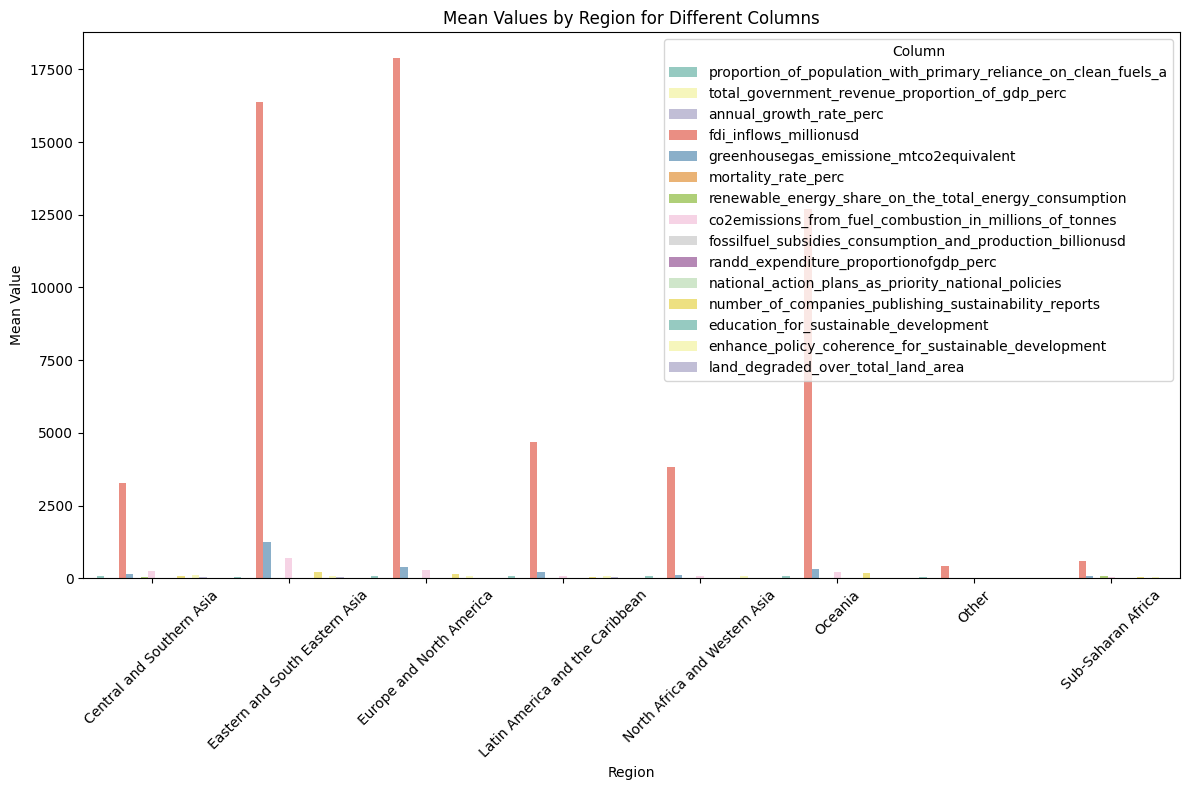

In [13]:
# Adjusting figure sizes
plt.figure(figsize=(12, 8))

# Use Seaborn's barplot to create a grouped bar plot
sns.barplot(x='region', y='Mean', hue='Column', data=melted_df, palette='Set3')

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Mean Value')
plt.title('Mean Values by Region for Different Columns')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Add a legend
plt.legend(title='Column', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [14]:
# Sorting the data by year
df_sorted = df.sort_values('dt_year')

# Creating an interactive line plot with Bokeh
output_file('line_plot.html')  

# Create a Bokeh figure
fig = figure(title='Annual Growth Rate of GDP', x_axis_label='Year', y_axis_label='Growth Rate (%)')
fig.line(df_sorted['dt_year'], df_sorted['annual_growth_rate_perc'], line_color='blue')

# Adding a hover tool to display data on mouse hover
hover = HoverTool(tooltips=[('Year', '@x'), ('Growth Rate', '@y{0.2f}%')], mode='vline')
fig.add_tools(hover)

# Save the Bokeh plot as an interactive HTML file
save(fig, 'line_plot.html')

'/Users/ana.humel/repos/ONU_Sustainability/line_plot.html'

/var/folders/4g/41b4hv8s6w5dp1kjrjmddtnc0000gr/T/ipykernel_28096/1582821945.py:9: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



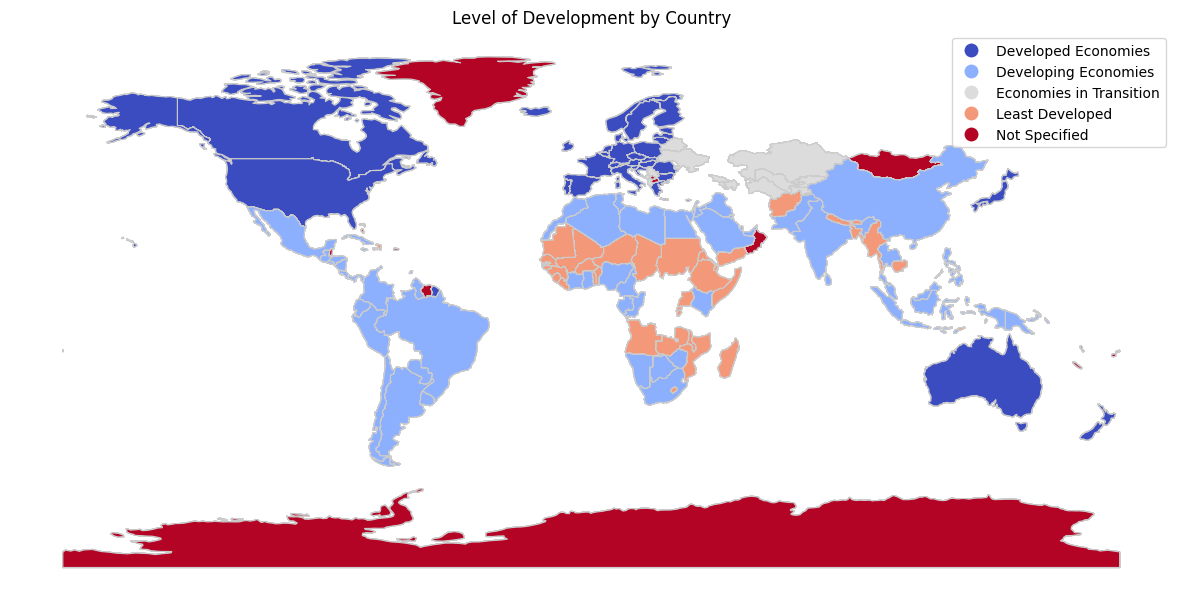

In [15]:
# Hereby we are trying to see each countries development status on a world map
# To understand how our data is distributed across the world,  we need to identify spatial patterns,
# and explore the relationship between development levels and geographical locations.

# Filtering out rows with missing development levels
filtered_data = df.dropna(subset=['level_of_development'])

# Loading the shapefile for the world map
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merging the data with the world map based on the country name
merged_data = world_map.merge(filtered_data, left_on='name', right_on='country')

# Ploting the map
fig, ax = plt.subplots(figsize=(15, 10))
merged_data.plot(column='level_of_development', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customizing the plot
ax.set_title('Level of Development by Country')
ax.set_axis_off()

# Show the plot
plt.show()

In [16]:
df.drop(columns=['national_action_plans_as_priority_national_policies', 'education_for_sustainable_development',  
'enhance_policy_coherence_for_sustainable_development',
'land_degraded_over_total_land_area', 'number_of_companies_publishing_sustainability_reports'], inplace=True) 
# Dropping the columns with fewest values in it 

### Train, validation, test datasets 

In [17]:

# Preparing the input features and target variable
selected_features = [
    'total_government_revenue_proportion_of_gdp_perc',
    'fdi_inflows_millionusd',
    'annual_growth_rate_perc',
    'proportion_of_population_with_primary_reliance_on_clean_fuels_a',
    'renewable_energy_share_on_the_total_energy_consumption',
    'co2emissions_from_fuel_combustion_in_millions_of_tonnes',
    'fossilfuel_subsidies_consumption_and_production_billionusd',
    'randd_expenditure_proportionofgdp_perc'
]

In [18]:

X = df[selected_features]
y = df['level_of_development']  

In [19]:

# Handle missing values
imputer = SimpleImputer(strategy='mean') 
X_imputed = imputer.fit_transform(X)


In [20]:

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [21]:
# Train the Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)



RandomForestClassifier()

In [22]:
# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9218146718146718


In [23]:

# Get the predicted labels for the test set
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))


                         precision    recall  f1-score   support

    Developed Economies       0.94      0.86      0.90       154
   Developing Economies       0.94      0.89      0.92       294
Economies in Transition       1.00      0.78      0.88        65
        Least Developed       0.93      0.92      0.93       169
          Not Specified       0.88      0.99      0.94       354

               accuracy                           0.92      1036
              macro avg       0.94      0.89      0.91      1036
           weighted avg       0.93      0.92      0.92      1036

[[133   3   0   0  18]
 [  5 263   0   9  17]
 [  3   8  51   1   2]
 [  0   4   0 156   9]
 [  0   1   0   1 352]]


Interpreting the results:

Developed Economies have a precision of 0.94, which means 94% of the predicted developed economies are correct. The recall for developed economies is 0.86, indicating that 86% of the actual developed economies were correctly identified by the model.
Developing Economies have a precision of 0.94 and a recall of 0.90, indicating a high percentage of correct predictions for this class.
Economies in Transition have a precision of 0.96 and a recall of 0.77, which means that the model performs well in terms of precision but is less effective in identifying all actual instances of this class (lower recall).
Least Developed has a precision of 0.94 and a recall of 0.93, indicating that the model performs well in predicting this class.
Not Specified has a precision of 0.89 and a recall of 0.99, indicating that the model is good at identifying this class but has a relatively higher number of false positives.
Overall, the model achieves an accuracy of 92%, which means that 92% of all predictions on the test set are correct.

It's important to consider both precision and recall, especially when dealing with imbalanced datasets. Depending on the specific problem and its requirements, you might prioritize precision or recall accordingly. A high F1-score usually indicates a good balance between precision and recall.

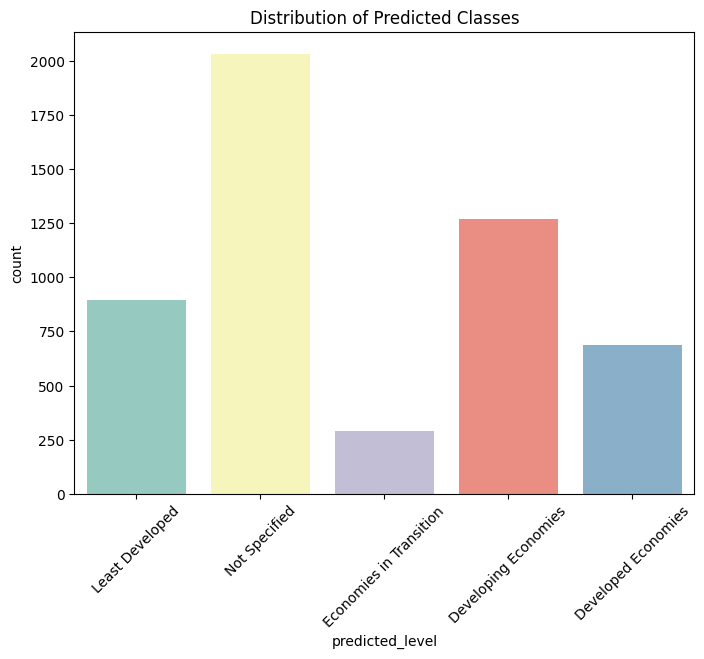

In [24]:
predicted_levels = model.predict(X_imputed)

# Create a DataFrame with country names and predicted levels
predicted_df = pd.DataFrame({'country': filtered_data['country'], 'predicted_level': predicted_levels})

# Create a countplot of predicted classes
plt.figure(figsize=(8, 6))
sns.countplot(data=predicted_df, x='predicted_level', palette='Set3')
plt.title('Distribution of Predicted Classes')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Remove duplicates from predicted_df based on the 'Country' column
predicted_df = predicted_df.drop_duplicates(subset='country')

# Merge data with the world shapefile based on country names
predicted_merged_data = world_map.merge(predicted_df, left_on='name', right_on='country')


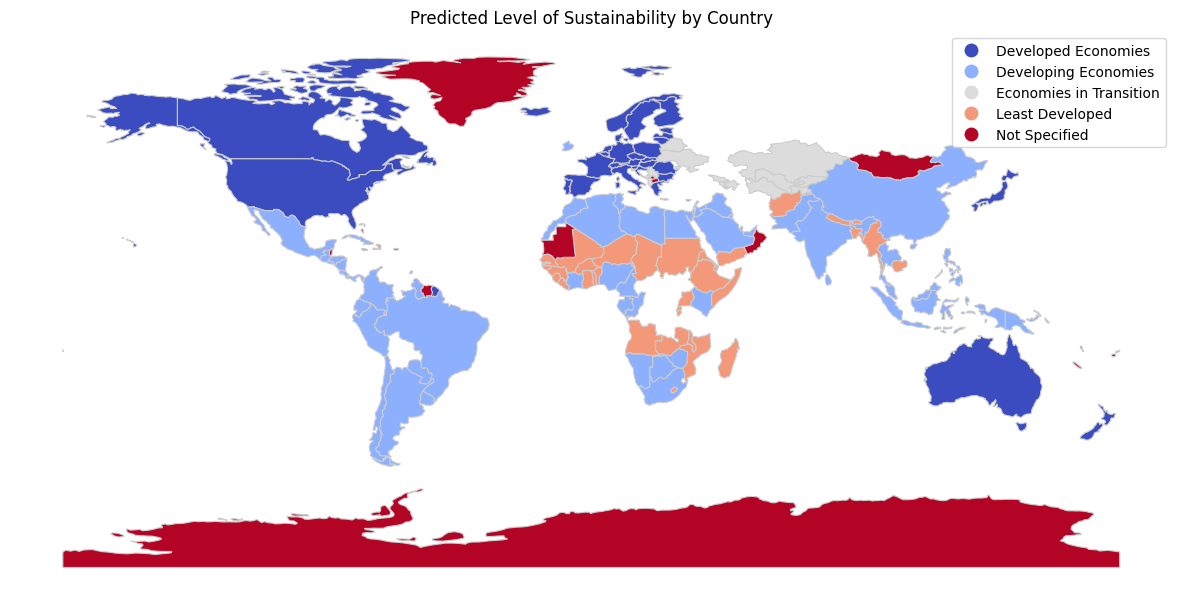

In [26]:

fig, ax = plt.subplots(figsize=(15, 10))
predicted_merged_data.plot(column='predicted_level', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Predicted Level of Sustainability by Country')
ax.set_axis_off()
plt.show()


In [27]:
# Joining filtered_data and predicted_merged_data on the "country" column
joined_data = filtered_data.merge(predicted_merged_data[['country', 'predicted_level']], left_on='country', right_on='country', how='inner')

# Extract the "Predicted_Level" and "level_of_development" columns
result = joined_data[['country', 'predicted_level', 'level_of_development']]

# Show the result
print(result)

          country       predicted_level  level_of_development
0     Afghanistan       Least Developed       Least Developed
1     Afghanistan       Least Developed       Least Developed
2     Afghanistan       Least Developed       Least Developed
3     Afghanistan       Least Developed       Least Developed
4     Afghanistan       Least Developed       Least Developed
...           ...                   ...                   ...
2951     Zimbabwe  Developing Economies  Developing Economies
2952     Zimbabwe  Developing Economies  Developing Economies
2953     Zimbabwe  Developing Economies  Developing Economies
2954     Zimbabwe  Developing Economies  Developing Economies
2955     Zimbabwe  Developing Economies  Developing Economies

[2956 rows x 3 columns]


In [28]:
# Detecting the differences between the columns for each country
result['Differences'] = (result['predicted_level'] != result['level_of_development'])

# Display the result
print(result[['country', 'predicted_level', 'level_of_development', 'Differences']])


          country       predicted_level  level_of_development  Differences
0     Afghanistan       Least Developed       Least Developed        False
1     Afghanistan       Least Developed       Least Developed        False
2     Afghanistan       Least Developed       Least Developed        False
3     Afghanistan       Least Developed       Least Developed        False
4     Afghanistan       Least Developed       Least Developed        False
...           ...                   ...                   ...          ...
2951     Zimbabwe  Developing Economies  Developing Economies        False
2952     Zimbabwe  Developing Economies  Developing Economies        False
2953     Zimbabwe  Developing Economies  Developing Economies        False
2954     Zimbabwe  Developing Economies  Developing Economies        False
2955     Zimbabwe  Developing Economies  Developing Economies        False

[2956 rows x 4 columns]


/var/folders/4g/41b4hv8s6w5dp1kjrjmddtnc0000gr/T/ipykernel_28096/4257658065.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
# Find rows where 'Differences' is True
differences_true = result[result['Differences'] == True]


# Remove duplicates from differences_true based on the 'country' column to find the countries
# that have different developmenyt status in actual and predicted tables
differences_true = differences_true.drop_duplicates(subset='country')
differences_true

country       predicted_level  level_of_development  Differences
1020       Ghana       Least Developed  Developing Economies         True
1300     Ireland  Developing Economies   Developed Economies         True
1736  Mauritania         Not Specified       Least Developed         True

### Evaluation and Validation of Model Performance

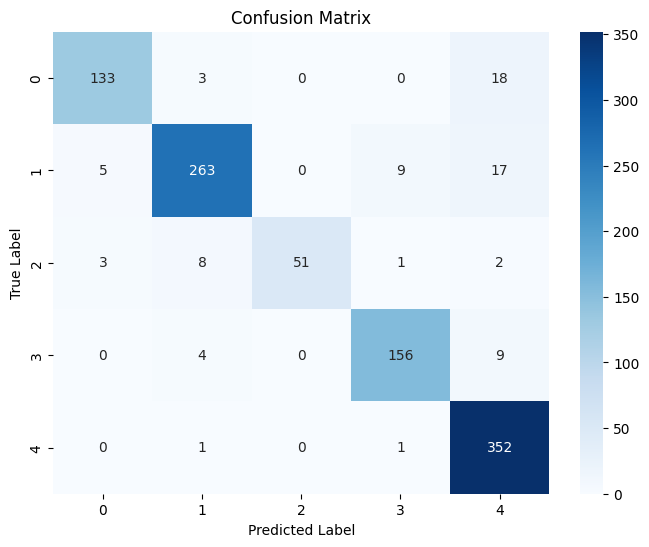

In [30]:
# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Creating a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# The confusion matrix heatmap below  shows the distribution of true positives, false positives,
# true negatives, and false negatives for each class. 
# This helps identify which classes the model performs well on and where it may have issues.

In [31]:
# Performing cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

# Cross-validation helps us to check the model's performance on different subsets of the training data. 
# The average cross-validation score is around 90.3%,
# suggesting that the model performs consistently well on various training subsets.

Cross-Validation Scores: [0.90096618 0.90096618 0.89371981 0.90821256 0.90700483]
Average Cross-Validation Score: 0.9021739130434783


In [32]:
# Below we use Grid search technique which helps us to identify 
# the best combination of  hyperparameters for the model.

# Define hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10],
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# The best hyperparameters found are {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
# with a corresponding best score of approximately 90.6%. 
# This indicates that these hyperparameters led to the best model performance during training.


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9057971014492754


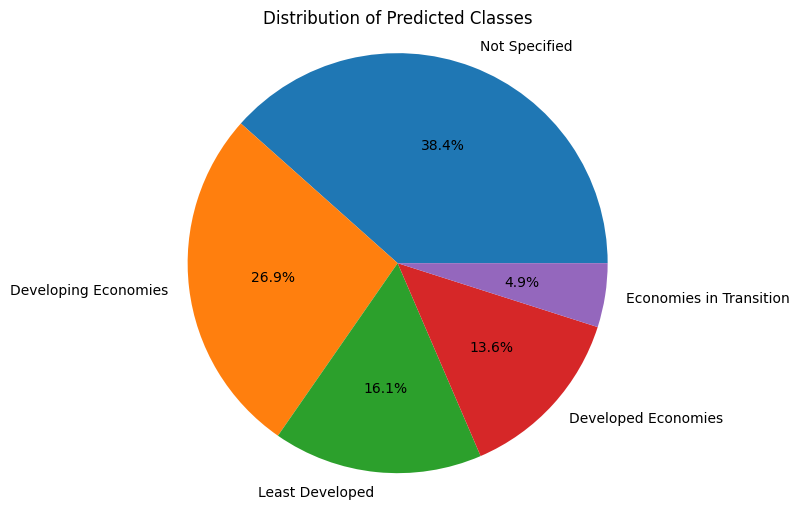

In [33]:
# Finally I want to see  a visual representation of the distribution of predicted classes from 
# our machine learning model.Each slice of the pie corresponds to a class, and the size of each 
# slice is proportional to the frequency with which that class was predicted by the model. 
# This visualization can help us quickly understand how the model's predictions are distributed 
# across different classes.
# Get the unique predicted labels
unique_labels = np.unique(y_pred)

# Count the occurrences of each predicted class
class_counts = {label: np.sum(y_pred == label) for label in unique_labels}

# Sort the class counts in descending order
class_counts = {k: v for k, v in sorted(class_counts.items(), key=lambda item: item[1], reverse=True)}

# Convert class labels and counts to lists
labels = list(class_counts.keys())
counts = list(class_counts.values())

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Predicted Classes')
plt.axis('equal')
plt.show()
